In [54]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
from scipy.signal import freqz

import pomozne as lib


# Poskus 1: primerjava čistega testnega signala ENF z referenčnim signalom ENF

V poskusu merimo korelacijo čistega testnega signala ENF z referenčnim signalom ENF. Celoten referenčni posnetek signala ENF je 8 minut in 5 sekund.

V poskusu definiramo dva testna signala:

1. testni signal predstavlja prvo minuto referenčnega posnetka
2. testni signal predstavlja del referenčnega posnetka med 1:23 in 1:53 (30 sekundni testni posnetek)

V poskusu izvajamo korelacijo brez uporabe filtrov.

## Poskus 1.1

### Branje zvočnih posnetkov in izris signalov


In [55]:
input_name = "001"

base_path = "./posnetki/poskus2/"
audio_path = base_path + input_name + "_1.wav"
ref_path = base_path + input_name + "_ref.wav"


In [56]:
SAMPLE_RATE = 400


In [57]:
audio_ref, sr = librosa.load(ref_path, sr=SAMPLE_RATE)
# audio, sr = librosa.load(audio_path, sr=SAMPLE_RATE)
audio = audio_ref[0 : (400 * 60)]

len(audio_ref), len(audio)


(192801, 24000)

Text(0.5, 1.0, 'Testni zvočni posnetek')

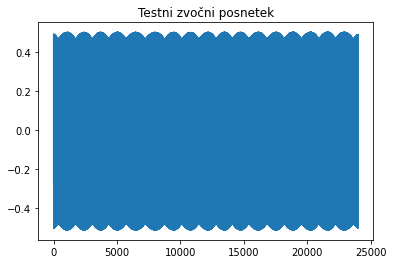

In [58]:
plt.plot(audio)
plt.title("Testni zvočni posnetek")


Text(0.5, 1.0, 'Referenčni zvočni posnetek')

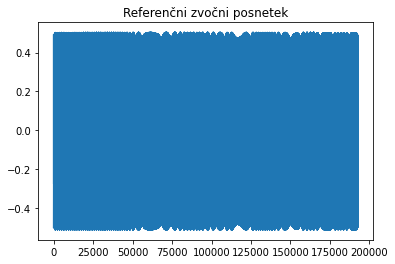

In [59]:
plt.plot(audio_ref)
plt.title("Referenčni zvočni posnetek")


### Določitev omejitev poskusa

V analizi se osredotočimo na frekvenčne komponente, kjer predvidevamo, da se nahaja signal ENF.

To so frekvenčne komponente v rangu `45 - 55 Hz`.


In [60]:
cut_f_min = 45
cut_f_max = 55


### Analiza frekvenčnega spektra (FFT)


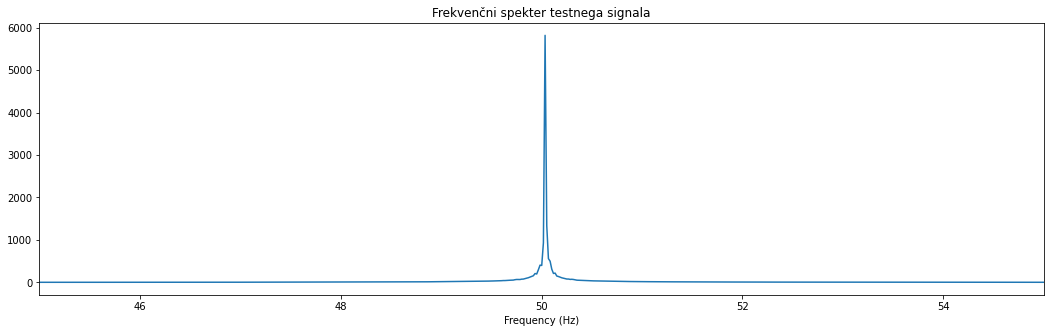

In [61]:
audio_f, audio_mag = lib.plot_magnitude_spectrum(
    audio, SAMPLE_RATE, "Frekvenčni spekter testnega signala", cut_f_min, cut_f_max)
plt.show()


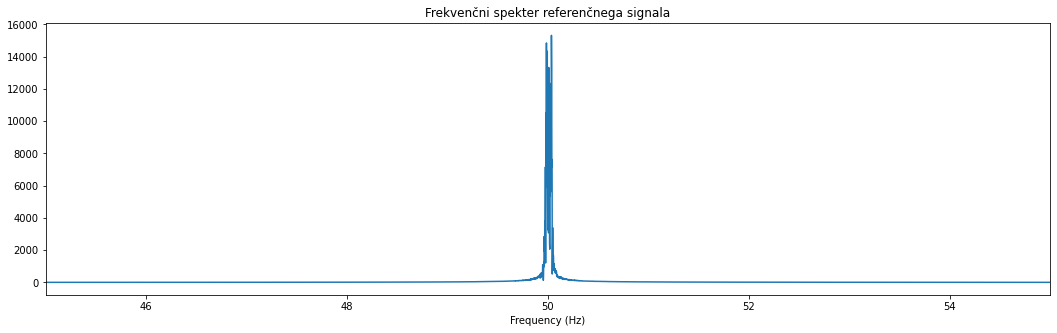

In [62]:
audio_f, audio_mag = lib.plot_magnitude_spectrum(
    audio_ref, SAMPLE_RATE, "Frekvenčni spekter referenčnega signala", cut_f_min, cut_f_max)
plt.show()


### Spektogramska analiza

Tudi v analizi spektograma se osredotočimo zgolj na območje frekvenčnih komponent signala ENF.

Spekter prikažemo v decimalnem in logaritmičnem merilu (`dB`).


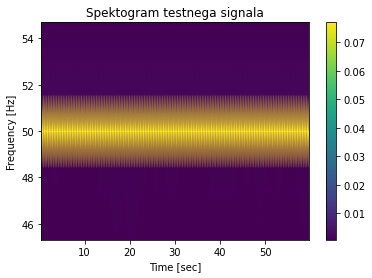

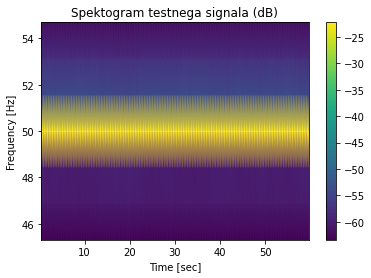

In [63]:
lib.specgram(audio, sr, title="Spektogram testnega signala",
             fmin=cut_f_min, fmax=cut_f_max)
lib.specgram(audio, sr, title="Spektogram testnega signala (dB)",
             fmin=cut_f_min, fmax=cut_f_max, dB=True)


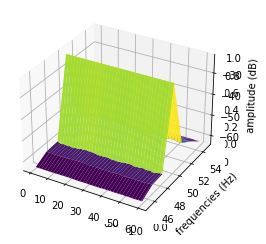

In [64]:
fig2, ax2 = plt.subplots(subplot_kw={'projection': '3d'})
lib.specgram3d(audio, fs=sr, fmin=cut_f_min, fmax=cut_f_max, dB=True)
plt.show()

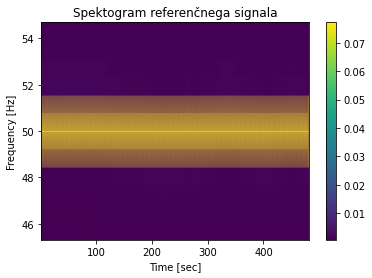

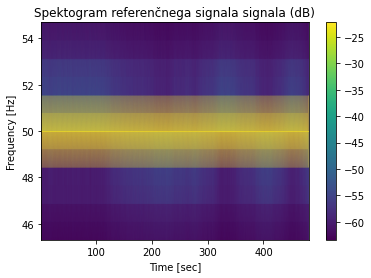

In [65]:
lib.specgram(audio_ref, sr, title="Spektogram referenčnega signala",
             fmin=cut_f_min, fmax=cut_f_max)
lib.specgram(audio_ref, sr, title="Spektogram referenčnega signala signala (dB)",
             fmin=cut_f_min, fmax=cut_f_max, dB=True)


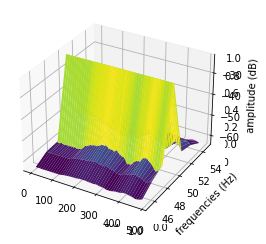

In [66]:
fig2, ax2 = plt.subplots(subplot_kw={'projection': '3d'})
lib.specgram3d(audio_ref, fs=sr, fmin=cut_f_min, fmax=cut_f_max, dB=True)
plt.show()

### Korelacija testnega in referenčnega signala

Korelacija je izračunana med testnim signalom v odvisnosti od referenčnega signala in odmika.

Najvišja korelacija predstavlja začetni trenutek testnega signala v referenčnem posnetku. Ker korelacijo računamo z lineranim odmikom, ta ostaja visoka za približen čas testnega signala.

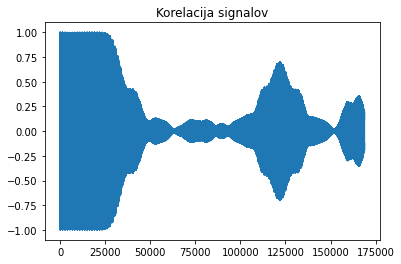

In [67]:
corr = lib.korelacija(audio_ref, audio)

plt.plot(range(0, len(corr)), corr)
plt.title("Korelacija signalov")
plt.show()

max_value = max(corr)
max_index = corr.index(max_value)

In [68]:
lib.index_to_seconds(SAMPLE_RATE, audio_ref, max_index), max_value[0]

(0.0, 1.0)

In [69]:
min_value = min(corr)
min_index = corr.index(min_value)

lib.index_to_seconds(SAMPLE_RATE, audio_ref, min_index), min_value[0]

(0.01, -0.9995441)

### Korelacija magnitud testnega in referenčnega signala

Pri računanju korelacije magnitud zanemarimo predznak amplitude signala. Korelacija ostaja višja kot v primeru predznačenih signalov. Zaznava začetka testnega signala v referenčnem je še vedno vidna.

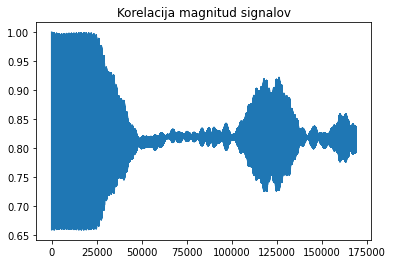

In [70]:
mag_audio = np.abs(audio)
mag_audio_ref = np.abs(audio_ref)

corr = lib.korelacija(mag_audio_ref, mag_audio)

plt.plot(range(0, len(corr)), corr)
plt.title("Korelacija magnitud signalov")
plt.show()

### Zaključek poskusa

V poskusu smo analizirali korelacijo med testnim signalom ENF brez dodanega šuma in referenčnim signalom ENF. Testni signal je predstavljal prvih 60 sekund daljšega referenčnega signala.

Glede na neprisotnost šuma, smo pšričakovali visoko korelacijo med tetsnim in referenčnim signalom. Najvišja pričakovana korelacija je bila enaka ena, izračunana med testnim signalom in referenčnim signalom v času `0 - 60s`.

Iz poskusa se je izkazalo, da je naša predpostavka bila pravilna. Korelacija je bila najvišja in eneka ena pri izračunu korelacije med testnim signalom in referenčnim signalom v trajanju `0-60s`.

## Poskus 1.2

### Branje zvočnih posnetkov in izris signalov


In [71]:
input_name = "01"

base_path = "./posnetki/poskus1/"
audio_path = base_path + input_name + "_2.wav"
ref_path = base_path + input_name + "_ref.wav"


In [72]:
SAMPLE_RATE = 400

In [73]:
audio, sr = librosa.load(audio_path, sr=SAMPLE_RATE)
audio_ref, sr = librosa.load(ref_path, sr=SAMPLE_RATE)

Text(0.5, 1.0, 'Testni zvočni posnetek')

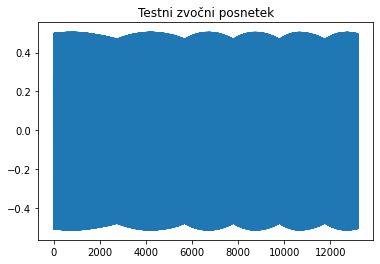

In [74]:
plt.plot(audio)
plt.title("Testni zvočni posnetek")

Text(0.5, 1.0, 'Referenčni zvočni posnetek')

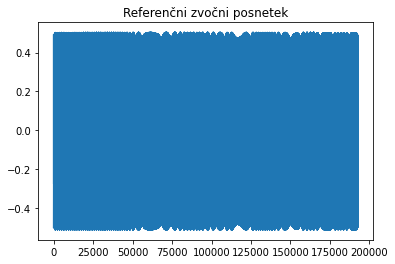

In [75]:
plt.plot(audio_ref)
plt.title("Referenčni zvočni posnetek")

### Določitev omejitev poskusa

V analizi se osredotočimo na frekvenčne komponente, kjer predvidevamo, da se nahaja signal ENF.

To so frekvenčne komponente v rangu `45 - 55 Hz`.


In [76]:
cut_f_min = 45
cut_f_max = 55

### Analiza frekvenčnega spektra (FFT)


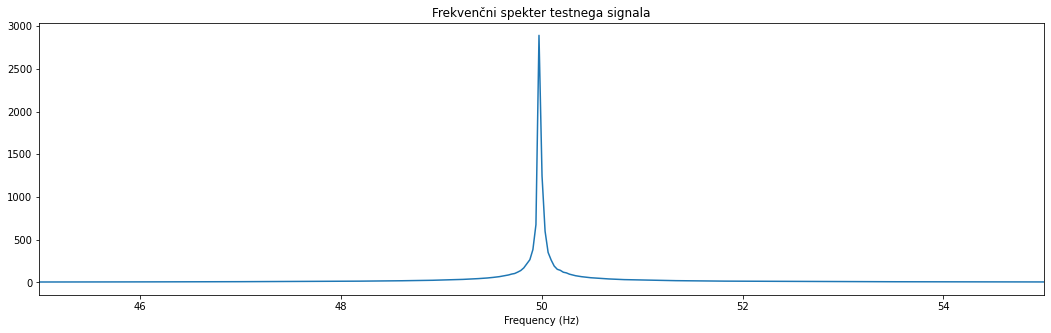

In [77]:
audio_f, audio_mag = lib.plot_magnitude_spectrum(
    audio, SAMPLE_RATE, "Frekvenčni spekter testnega signala", cut_f_min, cut_f_max)
plt.show()

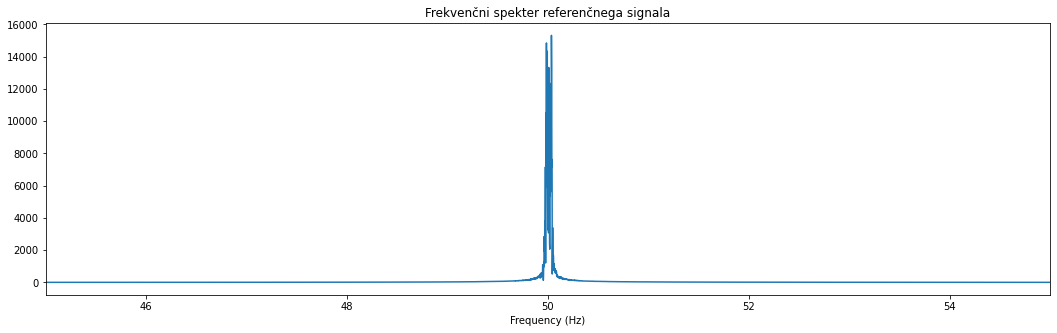

In [78]:
audio_f, audio_mag = lib.plot_magnitude_spectrum(
    audio_ref, SAMPLE_RATE, "Frekvenčni spekter referenčnega signala", cut_f_min, cut_f_max)
plt.show()

### Spektogramska analiza

Tudi v analizi spektograma se osredotočimo zgolj na območje frekvenčnih komponent signala ENF.

Spekter prikažemo v decimalnem in logaritmičnem merilu (`dB`).


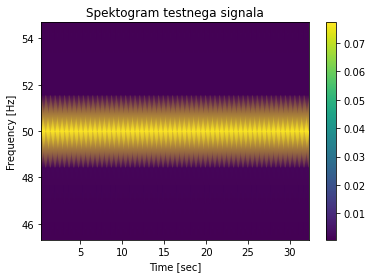

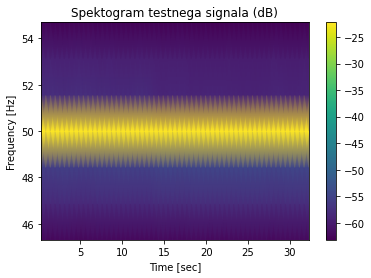

In [79]:
lib.specgram(audio, sr, title="Spektogram testnega signala",
             fmin=cut_f_min, fmax=cut_f_max)
lib.specgram(audio, sr, title="Spektogram testnega signala (dB)",
             fmin=cut_f_min, fmax=cut_f_max, dB=True)


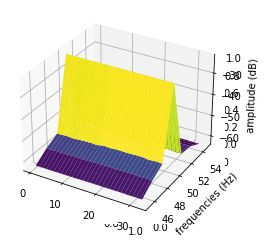

In [80]:
fig2, ax2 = plt.subplots(subplot_kw={'projection': '3d'})
lib.specgram3d(audio, fs=sr, fmin=cut_f_min, fmax=cut_f_max, dB=True)
plt.show()

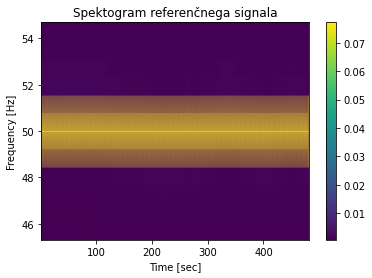

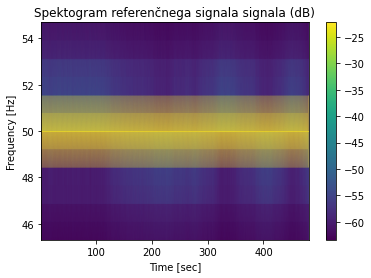

In [81]:
lib.specgram(audio_ref, sr, title="Spektogram referenčnega signala",
             fmin=cut_f_min, fmax=cut_f_max)
lib.specgram(audio_ref, sr, title="Spektogram referenčnega signala signala (dB)",
             fmin=cut_f_min, fmax=cut_f_max, dB=True)


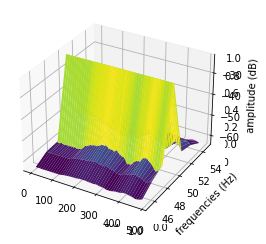

In [82]:
fig2, ax2 = plt.subplots(subplot_kw={'projection': '3d'})
lib.specgram3d(audio_ref, fs=sr, fmin=cut_f_min, fmax=cut_f_max, dB=True)
plt.show()

### Korelacija testnega in referenčnega signala

Korelacija je izračunana med testnim signalom v odvisnosti od referenčnega signala in odmika.

Najvišja korelacija predstavlja začetni trenutek testnega signala v referenčnem posnetku. Ker korelacijo računamo z lineranim odmikom, ta ostaja visoka za približen čas testnega signala.

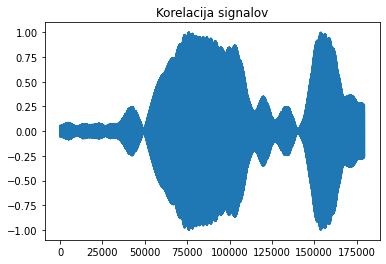

In [83]:
corr = lib.korelacija(audio_ref, audio)

plt.plot(range(0, len(corr)), corr)
plt.title("Korelacija signalov")
plt.show()

max_value = max(corr)
max_index = corr.index(max_value)

In [84]:
lib.index_to_seconds(SAMPLE_RATE, audio_ref, max_index), max_value[0]

(190.0, 0.99999994)

In [85]:
min_value = min(corr)
min_index = corr.index(min_value)

lib.index_to_seconds(SAMPLE_RATE, audio_ref, min_index), min_value[0]

(190.01, -0.99956095)

### Korelacija magnitud testnega in referenčnega signala

Pri računanju korelacije magnitud zanemarimo predznak amplitude signala. Korelacija ostaja višja kot v primeru predznačenih signalov. Zaznava začetka testnega signala v referenčnem je še vedno vidna.

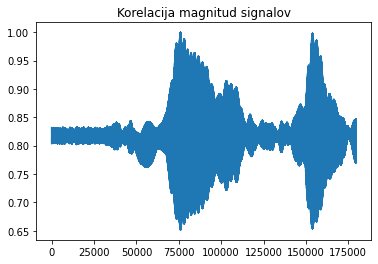

In [86]:
mag_audio = np.abs(audio)
mag_audio_ref = np.abs(audio_ref)

corr_mag = lib.korelacija(mag_audio_ref, mag_audio)

plt.plot(range(0, len(corr_mag)), corr_mag)
plt.title("Korelacija magnitud signalov")
plt.show()

### Zaključek poskusa

V poskusu smo analizirali korelacijo med testnim signalom ENF brez dodanega šuma in referenčnim signalom ENF. Testni signal je predstavljal 30 sekundni izsek daljšega referenčnega signala z odmikom 190 sekund.

Glede na neprisotnost šuma, smo pričakovali visoko korelacijo med testnim in referenčnim signalom. Najvišja pričakovana korelacija je bila enaka ena, izračunana med testnim signalom in referenčnim signalom v času `190 - 220s`.

Iz poskusa se je izkazalo, da je naša predpostavka bila pravilna.

Iz obeh poskusov lahko predpostavimo, da naša tehnika zaznave korelacije pravilno deluje. Zato s poskusi nadaljujemo.